In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


Let's import the necessary libraries first

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now, let's import our train and test dat

In [4]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [5]:
train.info

<bound method DataFrame.info of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       

Store the labels in 'y', and remove them from the test dataset

In [6]:
y=train['label']
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [7]:
train.drop("label",inplace=True, axis=1)

Now, we will reshape our data so that it can fit in our model

In [8]:
train = train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
train.shape, test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [9]:
train = train/255
test=test/255

In [10]:
# train[:5]

Let's visualize one example

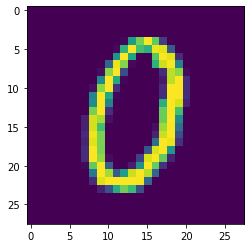

In [11]:
import matplotlib.pyplot as plt
plt.imshow(train[5])

In [12]:
train = np.array(train)
y = np.array(y)
test = np.array(test)

the followinf line will make a sequence like one hot encoding
if y=7 then it will make it to y= [0,0,0,0,0,0,0,7,0,0]

In [13]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes=10)

In [14]:
y[5]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
train.shape

(42000, 28, 28, 1)

Now let's build our model. 

In [16]:
from keras import Sequential, optimizers
from keras.layers import Embedding, LSTM, Dense, Dropout,Bidirectional,ConvLSTM2D,GRU,SimpleRNN,RNN
from keras import regularizers
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,Conv1D,MaxPooling1D, Conv2D , MaxPooling2D

model = Sequential()
model.add((Conv2D(filters=4, kernel_size=4, input_shape=(28, 28, 1),activation='relu', padding='same')))
model.add((Conv2D(filters=4, kernel_size=4,activation='relu')))
model.add((Conv2D(filters=4, kernel_size=4,activation='relu')))
model.add((Conv2D(filters=4, kernel_size=4,activation='relu')))

model.add(Dense(32,input_shape=(784,1),activation='relu'))

# model.add(Conv2D(16, 4, activation='relu',input_shape=(784,1)))
model.add((MaxPooling2D(pool_size=(2,2))))
model.add(Flatten())
# model.add(Dense(16,activation='relu'))


model.add(Dense(10, activation='softmax'))


opt = optimizers.Adam(learning_rate=0.001)
#lr=0.0005


model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

Model Summery:

In [17]:
model.build
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 4)         68        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 4)         260       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 4)         260       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 4)         260       
_________________________________________________________________
dense (Dense)                (None, 19, 19, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2592)              0

Let's train the model

In [18]:
history=model.fit(train,y,batch_size=512, epochs=70)

Epoch 1/70
83/83 [==============================] - 6s 15ms/step - loss: 1.8264 - acc: 0.4246
Epoch 2/70
83/83 [==============================] - 1s 15ms/step - loss: 0.4034 - acc: 0.8688
Epoch 3/70
83/83 [==============================] - 1s 15ms/step - loss: 0.1770 - acc: 0.9467
Epoch 4/70
83/83 [==============================] - 1s 15ms/step - loss: 0.1227 - acc: 0.9639
Epoch 5/70
83/83 [==============================] - 1s 15ms/step - loss: 0.0997 - acc: 0.9697
Epoch 6/70
83/83 [==============================] - 1s 15ms/step - loss: 0.0898 - acc: 0.9722
Epoch 7/70
83/83 [==============================] - 1s 15ms/step - loss: 0.0737 - acc: 0.9788
Epoch 8/70
83/83 [==============================] - 1s 15ms/step - loss: 0.0641 - acc: 0.9818
Epoch 9/70
83/83 [==============================] - 1s 15ms/step - loss: 0.0652 - acc: 0.9794
Epoch 10/70
83/83 [==============================] - 1s 15ms/step - loss: 0.0645 - acc: 0.9811
Epoch 11/70
83/83 [==============================] - 1s 15m

Plot accuracy and loss

KeyError: 'val_acc'

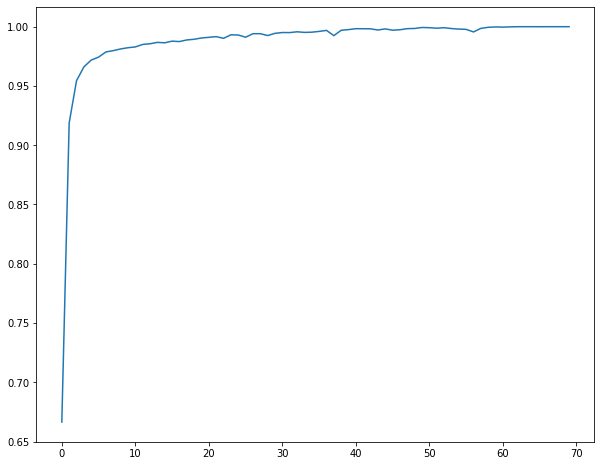

In [19]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.savefig('model_Accuracy.png',dpi=600)

plt.show()


plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.savefig('model_loss.png', dpi=600)

plt.show()

Now let's make prediction with the test dataset 

In [20]:
prediction=model.predict_classes(test)


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
prediction[:5]

array([2, 0, 9, 9, 3])

In [22]:
prediction=pd.DataFrame(prediction)

In [23]:
prediction.columns=["Label"]

In [24]:
res=pd.concat([pd.Series(range(1,28001),name = "ImageId"), prediction], axis=1)
res[:5]

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


Save the predictions in csv

In [25]:
sub = res.to_csv('submission.csv', index=False)